<a href="https://colab.research.google.com/github/mathchou/CSC485-Sp24/blob/egelchie/DataSciCapstoneEGelchie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

# Open the CSV file with a different encoding
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Print the DataFrame
print(df)


       reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, 

In [18]:
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).str.replace(' stars', '').str.replace(' star', '').astype(int)

# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '').astype(int)


In [23]:
import pandas as pd
import re


# Load the dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Define a function to extract the first number from a string
def extract_number(text):
    # Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Return the first number as an integer, or NaN if there are no numbers
    return int(numbers[0]) if numbers else float('nan')

# Apply the function to the 'rating' column
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).apply(extract_number)

# Apply the function to the 'rating_count' column
# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).apply(extract_number)

# To handle 'review_time', we need to check the actual content and clean it accordingly
def convert_review_time_to_days(review_time_str):
    # Lowercase the string to make it case-insensitive
    review_time_str = review_time_str.lower()
    numbers = re.findall(r'\d+', review_time_str)
    if 'month' in review_time_str and numbers:
        return int(numbers[0]) * 30
    elif 'day' in review_time_str and numbers:
        return int(numbers[0])
    elif 'year' in review_time_str and numbers:
        return int(numbers[0]) * 365
    else:
        return float('nan')  # Return NaN for unknown formats

# Apply the conversion function to the 'review_time' column
df['review_time_days'] = df['review_time'].astype(str).apply(convert_review_time_to_days)

# Now, df['review_time_days'] should have the review times converted to days


# Define a function to extract the first number from a string
def extract_number(text):
    # Find all numbers in the string
    numbers = re.findall(r'\d+', text)
    # Return the first number as an integer, or NaN if there are no numbers
    return int(numbers[0]) if numbers else float('nan')

# Apply the function to the 'rating' column
# Ensure 'rating' is a string before replacing and converting to numeric
df['rating'] = df['rating'].astype(str).apply(extract_number)

# Apply the function to the 'rating_count' column
# Ensure 'rating_count' is a string before removing commas and converting to numeric
df['rating_count'] = df['rating_count'].astype(str).apply(extract_number)

# To handle 'review_time', we need to check the actual content and clean it accordingly
def convert_review_time_to_days(review_time_str):
    # Lowercase the string to make it case-insensitive
    review_time_str = review_time_str.lower()
    numbers = re.findall(r'\d+', review_time_str)
    if 'month' in review_time_str and numbers:
        return int(numbers[0]) * 30
    elif 'day' in review_time_str and numbers:
        return int(numbers[0])
    elif 'year' in review_time_str and numbers:
        return int(numbers[0]) * 365
    else:
        return float('nan')  # Return NaN for unknown formats

# Apply the conversion function to the 'review_time' column
df['review_time_days'] = df['review_time'].astype(str).apply(convert_review_time_to_days)

# Now, df['review_time_days'] should have the review times converted to days



In [8]:
# Print the shape of the DataFrame to see how many rows and columns it has
print(df.shape)

(33396, 10)


In [9]:
# Print the data types of each column to understand what types of data are stored
print(df.dtypes)

reviewer_id        int64
store_name        object
category          object
store_address     object
latitude         float64
longitude        float64
rating_count      object
review_time       object
review            object
rating            object
dtype: object


In [10]:
# Print descriptive statistics for numerical columns to get a sense of the data distribution
print(df.describe())

        reviewer_id     latitude      longitude
count  33396.000000  32736.000000  32736.000000
mean   16698.500000     34.442546    -90.647033
std     9640.739131      5.344116     16.594844
min        1.000000     25.790295   -121.995421
25%     8349.750000     28.655350    -97.792874
50%    16698.500000     33.931261    -81.471414
75%    25047.250000     40.727401    -75.399919
max    33396.000000     44.981410    -73.459820


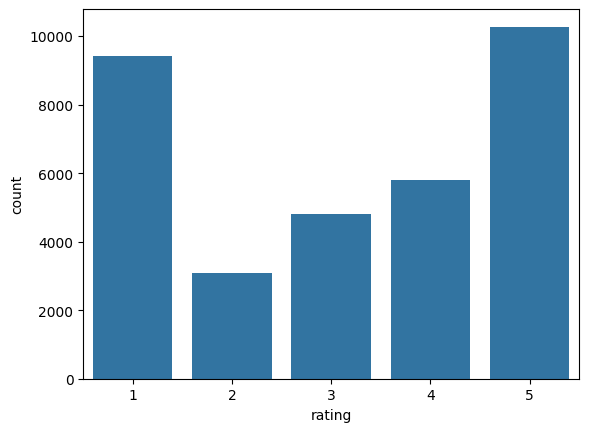

In [26]:
# Distribution of ratings
sns.countplot(data=df, x='rating')
plt.show()

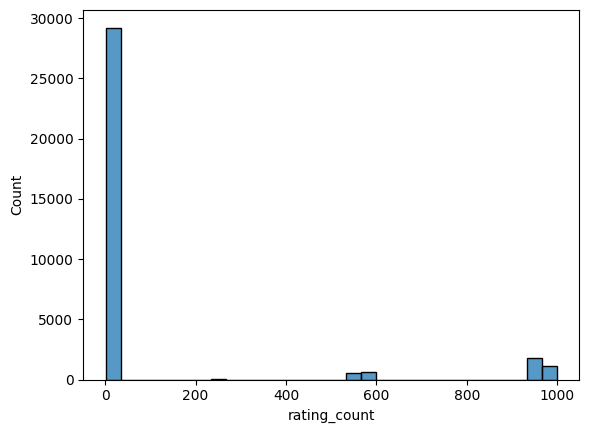

In [25]:
# Rating counts distribution
sns.histplot(data=df, x='rating_count', bins=30)
plt.show()

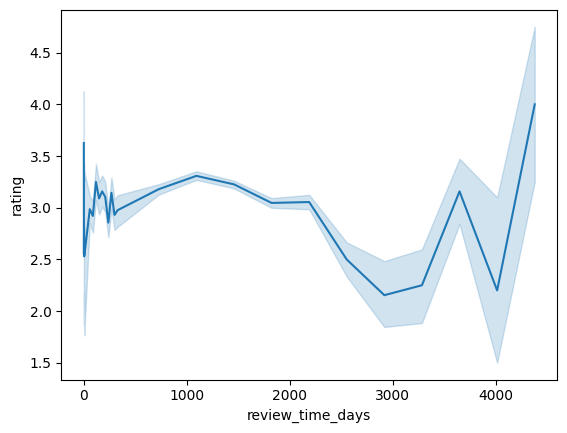

In [27]:
# Trend of ratings over time
sns.lineplot(data=df, x='review_time_days', y='rating')
plt.show()

<ipython-input-28-04e2334a54a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


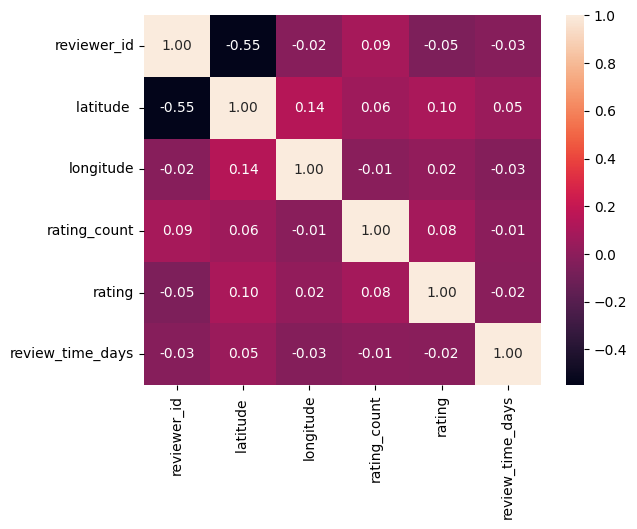

In [28]:
# Correlation matrix to see if there's any relationship between numeric fields
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

<ipython-input-13-923d1fbfac93>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_map.corr(), annot=True, cmap='coolwarm')


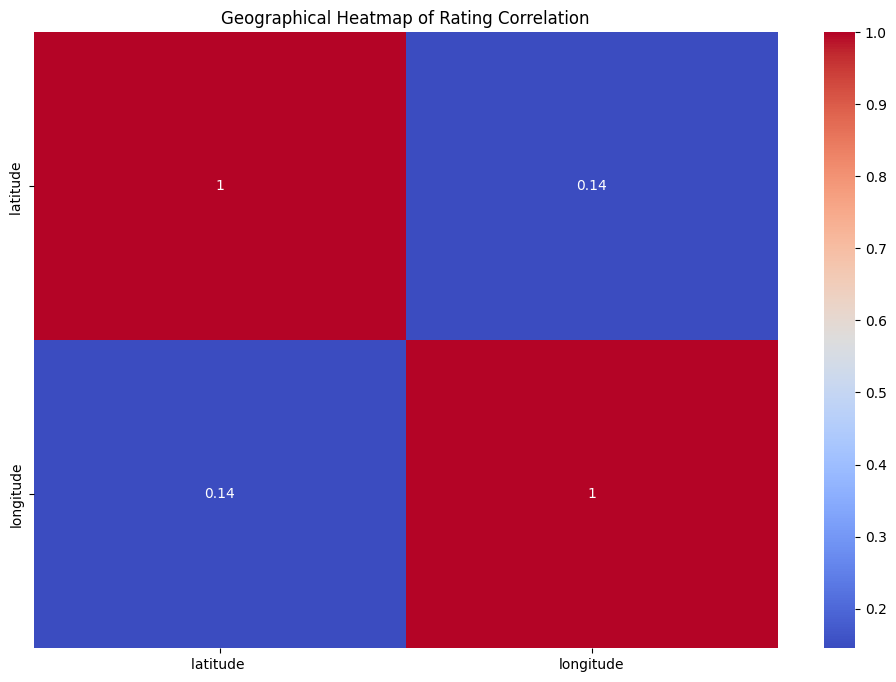

In [13]:
# prompt: generate a geographical graph heat map showing correlation between rating and geographical location

# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new DataFrame with only the relevant columns
df_map = df[['rating', 'latitude ', 'longitude']]

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df_map.corr(), annot=True, cmap='coolwarm')
plt.title('Geographical Heatmap of Rating Correlation')
plt.show()


In [16]:
import folium
from folium import plugins
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/My Drive/McDonald_s_Reviews.csv', encoding='ISO-8859-1')

# Clean the 'rating' column by removing 'stars' or 'star' and converting to integer
df['rating'] = df['rating'].str.replace(' stars', '').str.replace(' star', '').astype(int)

# Now can proceed with the heatmap creation as described previously
# Assuming DataFrame has 'latitude', 'longitude', and 'rating' columns
# Adjust 'latitude', 'longitude', and 'rating' to match actual column names
latitude_column = 'latitude '  # Adjust this to actual latitude column name
longitude_column = 'longitude'  # Adjust this to actual longitude column name
rating_column = 'rating'  # Adjust this to actual rating column name

# Filter out rows where any of the required information is missing
df_filtered = df.dropna(subset=[latitude_column, longitude_column, rating_column])

# Create a base map
map = folium.Map(location=[df_filtered[latitude_column].mean(), df_filtered[longitude_column].mean()], zoom_start=5)

# Create a heatmap layer
heatmap_data = [
    (row[latitude_column], row[longitude_column], row[rating_column])  # Using rating as weight
    for index, row in df_filtered.iterrows()
]
heatmap = plugins.HeatMap(heatmap_data, radius=15)  # can adjust radius and other parameters as needed

# Add the heatmap to the map
map.add_child(heatmap)

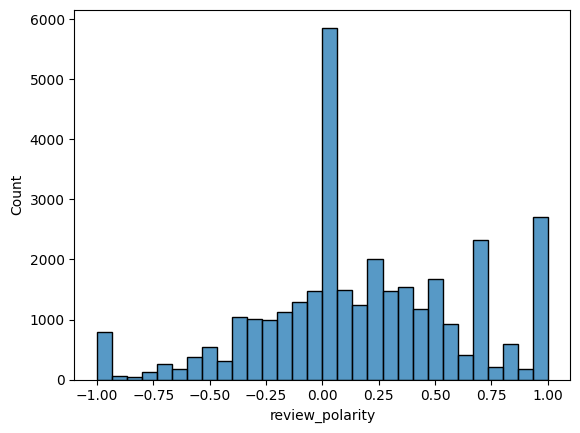

In [29]:
from textblob import TextBlob

# Sentiment analysis of reviews
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

df['review_polarity'] = df['review'].apply(get_polarity)

# Plot distribution of review sentiment polarity
sns.histplot(data=df, x='review_polarity', bins=30)
plt.show()
